<img src="https://i.imgur.com/6U6q5jQ.png"/>

<a target="_blank" href="https://colab.research.google.com/github/SocialAnalytics-StrategicIntelligence/codes/blob/main/TheGeoDataFrame_intro.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [ ]:
%reset
# starting fresh

# The Geo Dataframe

The geodataframe (GDF) is a dataframe (DF) where every row represents an spatial element (point, line, polygon).

Historically, the most common file type that stores spatial elements is the shapefile. Let's take a look at some of them:

1. Create a repository named: introgeodf.
2. Clone that repo to a local folder in your computer.
3. In that local folder in your computer, create a folder named **maps**.
4. Go to this [website](https://www.efrainmaps.es/english-version/free-downloads/world/).
5. Download three map files into the folder **maps** in your computer: *countries*, *cities*, and *rivers*.

You may see something like this:

<img src="https://github.com/CienciaDeDatosEspacial/code_and_data/blob/main/mapsFolderImage.png?raw=true">

You can decompress those files:

<img title="a title" alt="Alt text" src="https://github.com/CienciaDeDatosEspacial/code_and_data/blob/main/folderRar_1.png?raw=true">

Now, take a look a **World_Countries**:

<img src="https://github.com/CienciaDeDatosEspacial/code_and_data/blob/main/imageCountries_shp.png?raw=true">

There, you see that this **one map** requires **several files**. That is the nature of the shapefile.

Let's read the file with the help of **geopandas**:

In [2]:
import os, geopandas as gpd

countries=gpd.read_file(os.path.join("maps","World_Countries","World_Countries.shp"))

Let's use some familiar DF functions:

In [3]:
# what is it? = STR
type(countries)

geopandas.geodataframe.GeoDataFrame

In [4]:
# dimensions
countries.shape

(252, 2)

In [5]:
# names
countries.columns

Index(['COUNTRY', 'geometry'], dtype='object')

In [6]:
# some content
countries.head()

,COUNTRY,geometry
0,Aruba (Netherlands),"POLYGON ((-69.88223 12.41111, -69.94695 12.436..."
1,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ..."
2,Afghanistan,"POLYGON ((61.27656 35.60725, 61.29638 35.62853..."
3,Algeria,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236..."
4,Azerbaijan,"MULTIPOLYGON (((46.54037 38.87559, 46.49554 38..."


In [7]:
# any missing values?
countries[countries.isna().any(axis=1)]

,COUNTRY,geometry


In [8]:
# types
countries.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   COUNTRY   252 non-null    object  
 1   geometry  252 non-null    geometry
dtypes: geometry(1), object(1)
memory usage: 4.1+ KB


As you see, every pandas command is working, but now we have a new column type: **geometry**. Let's see this map of countries:

<Axes: >

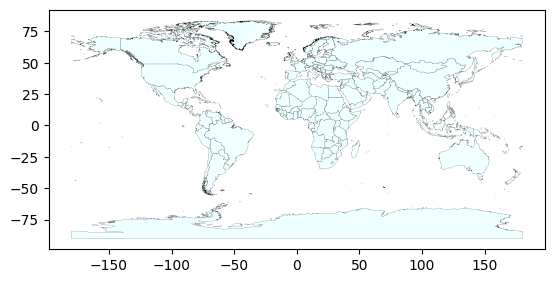

In [9]:
countries.plot(facecolor="azure",#color of polygon fill
               edgecolor='black', #color of lines
               linewidth=0.1) #thickness of lines

Let's open the other maps:

In [10]:
rivers=gpd.read_file(os.path.join("maps","World_Hydrography","World_Hydrography.shp"))
cities=gpd.read_file(os.path.join("maps","World_Cities","World_Cities.shp"))

This is the rivers map:

<Axes: >

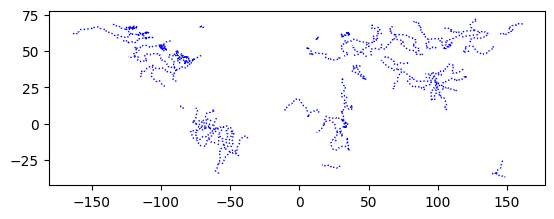

In [11]:
rivers.plot(edgecolor='blue',
            linewidth=1,
            linestyle='dotted')

This is the cities map:

<Axes: >

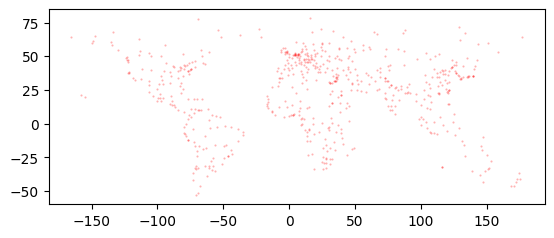

In [12]:
cities.plot(marker='.', # marker type
            color='red',
            markersize=1,
            alpha=0.3) # transparency

You can plot all the layers, as long as they share the same projection.
Let's verify that all have the same projection (**CRS**):

In [13]:
# CRS = sistema de referencia para las coordenadas
# Todos los mapas tienen ese archivo, sirve para unir archivos distintos
countries.crs==cities.crs==cities.crs

True

You can start by creating the layer on the back (the base), and add layers on top:

<Axes: >

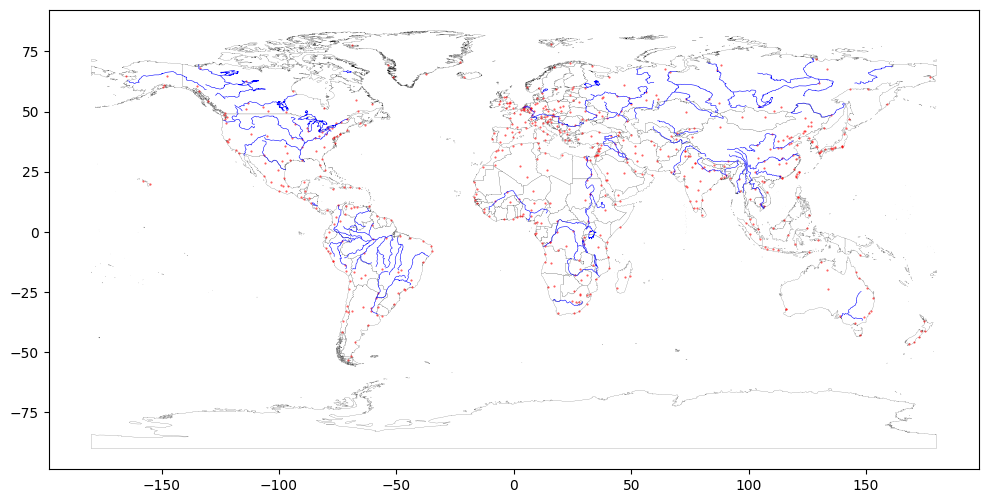

In [14]:
# ax=base -> sobreponer encima de "base".
base = countries.plot(facecolor="white",
                      edgecolor='black',
                      linewidth=0.1,
                      figsize=(12,12))

rivers.plot(edgecolor='blue', linewidth=0.4,
            ax=base)# on top of...
cities.plot(marker='.', color='red', markersize=1,alpha=0.7,
            ax=base) # on top of...


## Subsetting

You can subset your map by *filtering*:

In [15]:
brazil=countries[countries.COUNTRY=='Brazil']

In [16]:
cities.head()

,NAME,COUNTRY,CAPITAL,geometry
0,Murmansk,Russia,N,POINT (33.08604 68.96355)
1,Arkhangelsk,Russia,N,POINT (40.64616 64.52067)
2,Saint Petersburg,Russia,N,POINT (30.45333 59.95189)
3,Magadan,Russia,N,POINT (150.78001 59.57100)
4,Perm',Russia,N,POINT (56.23246 58.00024)


In [17]:
rivers.head()

,NAME,SYSTEM,geometry
0,Aldan,Lena,"LINESTRING (124.00678 56.47258, 123.25956 56.6..."
1,Amazon,Amazon,"MULTILINESTRING ((-61.27730 -3.60706, -60.6846..."
2,Amu Darya,NaN,"LINESTRING (73.98818 37.49952, 73.52595 37.528..."
3,Amur,NaN,"LINESTRING (122.63956 49.99730, 120.47874 49.2..."
4,Angara,NaN,"LINESTRING (105.07841 51.93053, 103.92959 51.7..."


But you can also subset by *clipping*, as sometimes other data frames may not have the same fields for filtering:

El CRS tiene que ser el mismo. Al hacer un clip seleccionamos todo lo que se encuentre dentro de un área determinada

In [18]:
cities_clipped = gpd.clip(gdf=cities,
                          mask=brazil)
rivers_clipped = gpd.clip(gdf=rivers,
                               mask=brazil)

Then, you can plot the clipped version:

<Axes: >

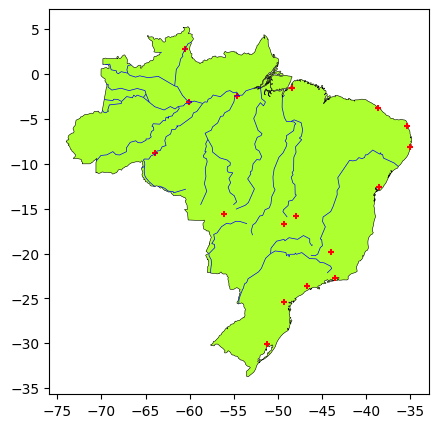

In [19]:
base = brazil.plot(facecolor="greenyellow", edgecolor='black', linewidth=0.4,figsize=(5,5))
cities_clipped.plot(marker='+', color='red', markersize=15,
                    ax=base)
rivers_clipped.plot(edgecolor='blue', linewidth=0.5,
                    ax=base)

You can also check what geometries you have in your GDF:

In [20]:
brazil.geom_type

29    MultiPolygon
dtype: object

In [21]:
cities_clipped.geom_type

285    Point
279    Point
276    Point
271    Point
268    Point
340    Point
275    Point
274    Point
568    Point
266    Point
447    Point
261    Point
338    Point
380    Point
381    Point
318    Point
421    Point
dtype: object

In [22]:
rivers_clipped.geom_type

56         LineString
55         LineString
97         LineString
67         LineString
70         LineString
38         LineString
24    MultiLineString
5          LineString
64         LineString
68         LineString
83    MultiLineString
92    MultiLineString
59         LineString
37         LineString
80         LineString
1     MultiLineString
60         LineString
29    MultiLineString
66    MultiLineString
62         LineString
54         LineString
dtype: object

Notice that the amount of elements (rows) is different, and that all those elements do not belong to the exact geometry type.

## Exporting your subset

You may need a couple of things here:

- Save the map as an image.
- Save the files (not the images).

Let's see:

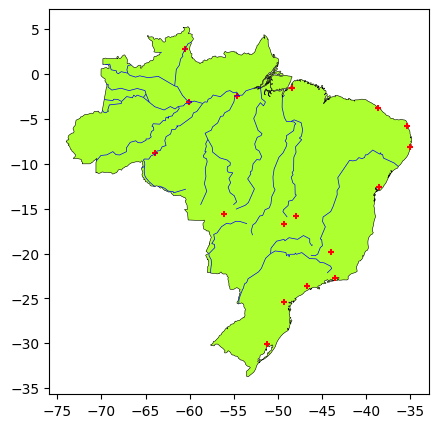

In [23]:
# save the map as image (create "images" folder first)
# Matplot es la librería gráfica.
# Crear la carpeta de destino "Images"
# "plt" es la abreciación de "matplotlib.plyplot" para no escribir todo en las siguiente lineas de código
import matplotlib.pyplot as plt

base = brazil.plot(facecolor="greenyellow", edgecolor='black', linewidth=0.4,figsize=(5,5))
cities=cities_clipped.plot(marker='+', color='red', markersize=15,ax=base)
river=rivers_clipped.plot(edgecolor='blue', linewidth=0.5,ax=base)
plt.savefig(os.path.join("images",'Brasil_3layers.jpg')) # "images" es la carpeta

We may export these layers as one different file (not shapefiles):

In [24]:
brazil.to_file(os.path.join("maps","brazilMaps.gpkg"), layer='country', driver="GPKG")
cities_clipped.to_file(os.path.join("maps","brazilMaps.gpkg"), layer='cities', driver="GPKG")
rivers_clipped.to_file(os.path.join("maps","brazilMaps.gpkg"), layer='rivers', driver="GPKG")

# guardar el nuevo archivo con tipo GPKG (Geopackages) nos permite crear un archivo con 3 mapas.
# Algo que no hace una archivo shapefile y no es recomendable porque son muchos archivos y GITHUB no lo leería.

The most important thing, now that you have saved these several maps into one file, is that once this file is stored in GitHub, you can call the map with the url GitHUb gives you:

In [25]:
# commit and push **brazilMaps.gpkg** and get a link like:
brazilMaps='https://github.com/SocialAnalytics-StrategicIntelligence/codes/raw/main/maps/brazilMaps.gpkg'

### Reading in from the cloud:

Let's use the *brazilMaps* link, and verify we have all the layers:

Importar base de datos desde página web

In [26]:
from  fiona import listlayers

listlayers(brazilMaps)

['country', 'cities', 'rivers']

Now you are confident what to request:

In [28]:
countryGit=gpd.read_file(brazilMaps,layer='country')
citiesGit=gpd.read_file(brazilMaps,layer='cities')
riversGit=gpd.read_file(brazilMaps,layer='rivers')

As you see, it works great:

<Axes: >

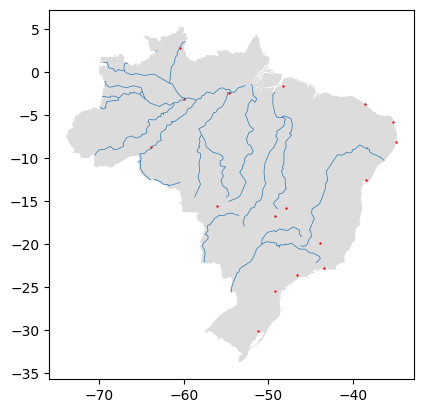

In [29]:
base = countryGit.plot(facecolor='gainsboro')
citiesGit.plot(ax=base, markersize=0.5, color='red')
riversGit.plot(ax=base, linewidth=0.5)

### Exercise 1

<div class="alert-success">
    
1. Create a repo: **simpleplot**
2. Clone that repo to your computer.
3. Get **three** _SHP_ files from the same **country** (do not use islands or small territories). You should have polygons (i.e. regions).
4. Save the three maps into one geopackage file.    
</div>



<a class="anchor" id="1"></a>

## Map Projection

The CRS is a very important property of the maps. They affect three aspects:

* shape
* area
* scale
* direction

Most maps come with a default CRS: 4326. Pay attention:

In [30]:
# check units
# el unit_name está con degree y queremos que esté en metros
countryGit.crs.axis_info

[Axis(name=Geodetic latitude, abbrev=Lat, direction=north, unit_auth_code=EPSG, unit_code=9122, unit_name=degree),
 Axis(name=Geodetic longitude, abbrev=Lon, direction=east, unit_auth_code=EPSG, unit_code=9122, unit_name=degree)]

Polygons have a centroid. When we try getting a centroid from an **unprojected** polygon, you get:

In [31]:
# centroid
countryGit.centroid

<ipython-input-31-5c8094a9931d>:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countryGit.centroid


0    POINT (-53.09009 -10.77302)
dtype: geometry

### Reprojecting

A projected CRS will have units in meters or feet (or similar):

In [32]:
# let's use CRS 3587
# Ese crs tiene como proyección unit name a metros
countryGit.to_crs(3587).crs.axis_info

[Axis(name=Easting, abbrev=X, direction=east, unit_auth_code=EPSG, unit_code=9001, unit_name=metre),
 Axis(name=Northing, abbrev=Y, direction=north, unit_auth_code=EPSG, unit_code=9001, unit_name=metre)]

The reprojected map will not complain if I request the centriod:

In [33]:
# cambiar el crs y calcular el centroide
countryGit.to_crs(3587).centroid

0    POINT (11374671.933 -6303368.608)
dtype: geometry

Let's plot both:

<Axes: >

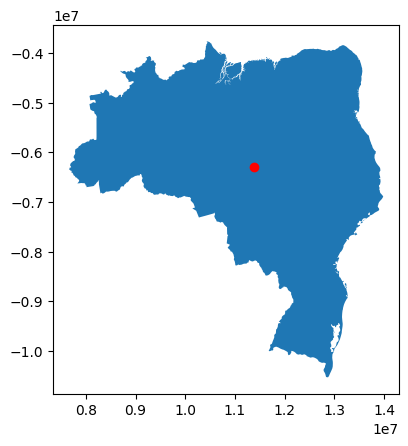

In [34]:
# plot this projected version

base3587= countryGit.to_crs(3587).plot()
countryGit.to_crs(3587).centroid.plot(color='red',ax=base3587)

We use the crs **3587** as an emergency option to reproject a map. However, for a more accurate option it is better to look for the ones explicitly prepared for a particular locations of the world. You can request a crs per country [here](https://epsg.io/?q=brazil+kind%3APROJCRS):

In [35]:
# recommended for Brazil (meters)
# el crs recomendado según la págine web es la 5641, procedemos a recalcular
countryGit.to_crs(5641).crs.axis_info

[Axis(name=Easting, abbrev=X, direction=east, unit_auth_code=EPSG, unit_code=9001, unit_name=metre),
 Axis(name=Northing, abbrev=Y, direction=north, unit_auth_code=EPSG, unit_code=9001, unit_name=metre)]

In [36]:
# this works
countryGit.to_crs(5641).centroid

0    POINT (3884486.179 8756856.093)
dtype: geometry

<Axes: >

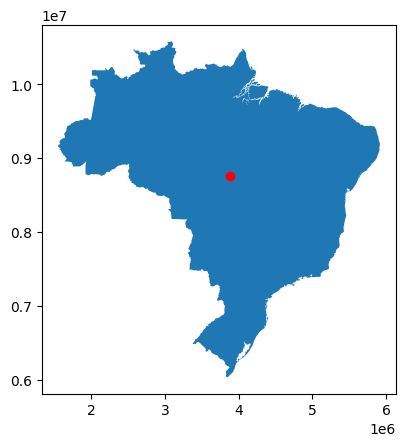

In [37]:
# replotting:

base5641=countryGit.to_crs(5641).plot()
countryGit.to_crs(5641).centroid.plot(color='red',ax=base5641)

Not using the right projection will give you a wrong numerical result when needing numerical accuracy; however, you might find situation where the visual output seems right (yet it is wrong):

<ipython-input-38-190a4191c057>:12: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countryGit.centroid.plot(color='red',ax=ax2)


<Axes: title={'center': 'unprojected'}>

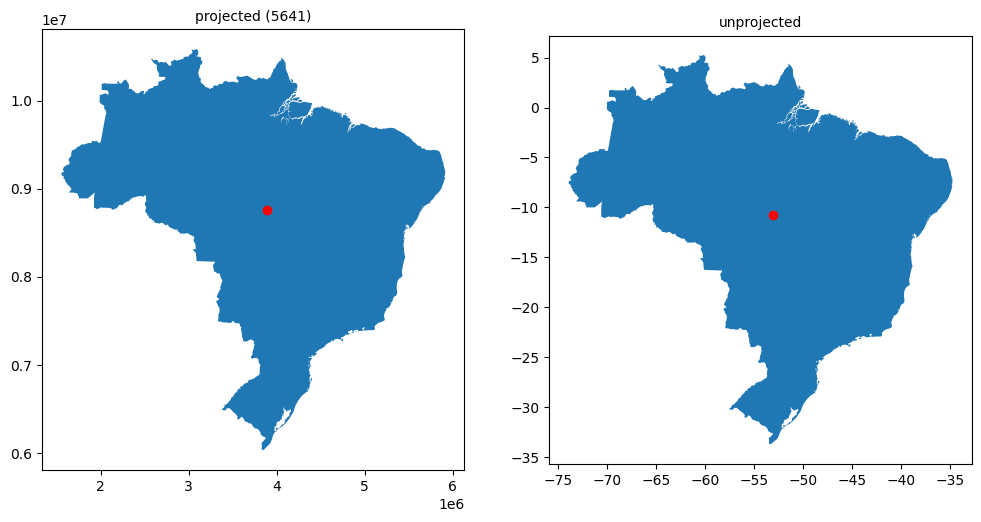

In [38]:
from matplotlib import pyplot

fig, (ax1, ax2) = pyplot.subplots(ncols=2, sharex=False, sharey=False, figsize=(12,12))

ax1.set_title('projected (5641)',fontsize=10)
countryGit.to_crs(5641).plot(ax=ax1)
countryGit.to_crs(5641).centroid.plot(color='red',ax=ax1)

# this gives a warning
ax2.set_title('unprojected',fontsize=10)
countryGit.plot(ax=ax2)
countryGit.centroid.plot(color='red',ax=ax2)

Let's keep the projected version for all our maps:

In [39]:
brazil_5641=countryGit.to_crs(5641)
# just Brazil

cities_5641=citiesGit.to_crs(brazil_5641.crs)
cities_5641=cities_5641[cities_5641.COUNTRY=='Brazil']

rivers_5641=riversGit.to_crs(brazil_5641.crs)
rivers_5641=gpd.clip(gdf=rivers_5641,mask=brazil_5641)

We could save these maps of Brazil:

In [40]:
# saving
import os

brazil_5641.to_file(os.path.join("maps","brazilMaps_5641.gpkg"), layer='country', driver="GPKG")
cities_5641.to_file(os.path.join("maps","brazilMaps_5641.gpkg"), layer='cities', driver="GPKG")
rivers_5641.to_file(os.path.join("maps","brazilMaps_5641.gpkg"), layer='rivers', driver="GPKG")

<a class="anchor" id="1_2"></a>

### Maps without CRS

Reprojecting seems a simple process, but you might find some interesting cases. Download the shapefile of Brazil - Subnational Administrative Boundaries from [here](https://data.humdata.org/dataset/cod-ab-bra) and save it in the maps folder (you need to unzip the file).

In [42]:
brazil_states=gpd.read_file(os.path.join("maps","bra_adm_ibge_2020_shp","bra_admbnda_adm1_ibge_2020.shp"))
brazil_municipalities=gpd.read_file(os.path.join("maps","bra_adm_ibge_2020_shp","bra_admbnda_adm2_ibge_2020.shp"))

Notice this:

In [43]:
brazil_states.crs, brazil_municipalities.crs

(None, None)

They do not have crs information, however:

<Axes: >

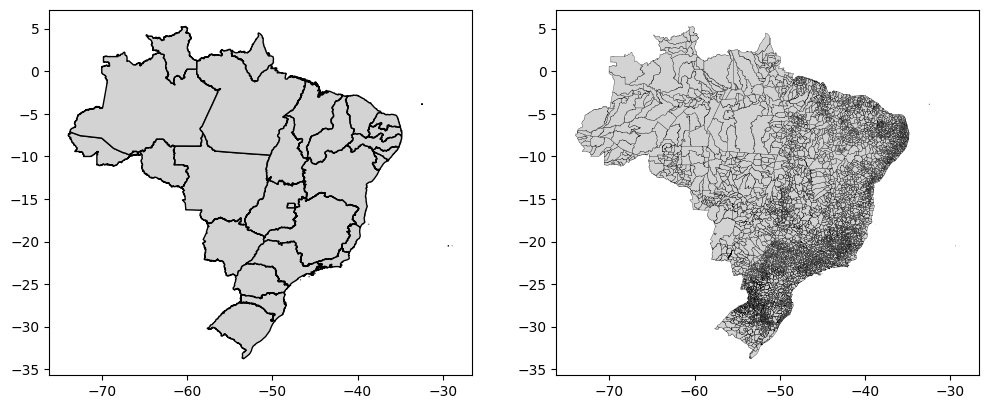

In [44]:
fig, (ax1, ax2) = pyplot.subplots(ncols=2, sharex=False, sharey=False, figsize=(12,12))

brazil_states.plot(ax=ax1, facecolor='lightgrey', edgecolor='black')
brazil_municipalities.plot(ax=ax2, facecolor='lightgrey', edgecolor='black',linewidth=0.2)

Since we are using the crs 5641 for Brazil, we could try:

In [45]:
# esta funcion solo funciona cuando hay un crs, por eso sale error, porque no tiene.Tiene geometría "naiv" que es el default
brazil_states.to_crs(5641)

ValueError: ignored

Python says _"Please set a crs on the object first"_. This would mean to know the actual projection, of the geometry:

In [46]:
brazil_states.geometry

0     MULTIPOLYGON (((-68.87747 -11.01987, -68.88027...
1     POLYGON ((-35.46317 -8.82467, -35.46457 -8.828...
2     MULTIPOLYGON (((-50.46147 2.11133, -50.45627 2...
3     MULTIPOLYGON (((-58.49367 -0.84197, -58.48917 ...
4     MULTIPOLYGON (((-38.70687 -17.96447, -38.70867...
5     MULTIPOLYGON (((-39.90847 -2.87407, -39.91257 ...
6     POLYGON ((-47.37689 -15.88092, -47.37781 -15.8...
7     MULTIPOLYGON (((-29.29937 -20.51987, -29.30147...
8     MULTIPOLYGON (((-47.28117 -17.12687, -47.27627...
9     MULTIPOLYGON (((-47.03127 -8.98527, -47.03537 ...
10    MULTIPOLYGON (((-56.65037 -17.32567, -56.64427...
11    MULTIPOLYGON (((-57.45677 -22.18997, -57.45467...
12    MULTIPOLYGON (((-47.14037 -17.00607, -47.14357...
13    MULTIPOLYGON (((-46.43447 -1.01537, -46.43887 ...
14    MULTIPOLYGON (((-34.86147 -6.98137, -34.85677 ...
15    MULTIPOLYGON (((-49.54087 -26.22697, -49.53667...
16    MULTIPOLYGON (((-34.96727 -8.37597, -34.96567 ...
17    POLYGON ((-41.78067 -2.76077, -41.77927 -2

From the plots above, it looks like an unprojected map, then:

In [47]:
# ESPG:4326 es el estándar de los no proyectados, siempre se usa cuando no tiene crs y luego se cambia al crs recomendado según la página.
brazil_states.crs = "EPSG:4326"
brazil_municipalities.crs = "EPSG:4326"

Now, we can reproject:

In [50]:
# reproyectamos a el crs recomendado
brazil_states_5641=brazil_states.to_crs(5641)
brazil_municipalities_5641=brazil_municipalities.to_crs(5641)

We update the file:

In [49]:
brazil_states_5641.to_file(os.path.join("maps","brazilMaps_5641.gpkg"), layer='states', driver="GPKG")
brazil_municipalities_5641.to_file(os.path.join("maps","brazilMaps_5641.gpkg"), layer='municipalities', driver="GPKG")

### Exercise 2

<div class="alert-success">

1. Get more file maps for your country (lower level administrative units).
2. Check all the CRSs of your GDFs.
3. If you find one CRS is missing, fill the CRS with the right projection.
4. If you have unprojected CRS, look for the right one and reset it.
</div>

<a class="anchor" id="1_1"></a>

### Formating Geoseries projections

You know **brazil_5641** is a multipolygon:

In [51]:
brazil_5641

,COUNTRY,geometry
0,Brazil,"MULTIPOLYGON (((1926257.542 8894978.397, 19262..."


Sometime, you just need the border (lines):

In [52]:
# convirtiendo un polígono a un conjunti de líneas cuando lo que quiero solo es el borde.
brazil_5641.boundary

0    MULTILINESTRING ((1926257.542 8894978.397, 192...
dtype: geometry

<Axes: >

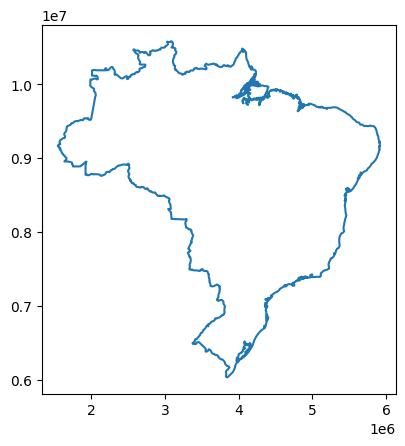

In [53]:
# This is just the borderline
brazil_5641.boundary.plot()

Always check the data type:

In [54]:
# does 'boundary' return a GDF?
type(brazil_5641.boundary)
# Geoseries es una columna, no es una table, sino una columna de una tabla -> debemos convertirlo a data frame
# Lo que en R se llaman columnas, en pyyhon se llaman series

geopandas.geoseries.GeoSeries

Some operations in geopandas require GDF or GS, but some may be exclusive for either. If you need a GDF instead of a GS:

In [55]:
# converting into GDF (GEO DATA FRAME)
brazil_5641.boundary.to_frame()

,0
0,"MULTILINESTRING ((1926257.542 8894978.397, 192..."


Notice you get a very simple GDF, and you may want to add some info:

In [56]:
# Útil cuando queremos creear bordes

# conversion
brazil_5641DF=brazil_5641.boundary.to_frame()

# new column (optional)
brazil_5641DF['name']='Brazil'

# renaming the geometry column called 0
brazil_5641DF.rename(columns={0:'geometry'},inplace=True)

#setting the geometry (the name is not enough) -> tienes que decirle que la columna llamada geometría contiene las geometrías
brazil_5641DF = brazil_5641DF.set_geometry("geometry")

# verifying crs:
brazil_5641DF.crs

<Projected CRS: EPSG:5641>
Name: SIRGAS 2000 / Brazil Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Brazil - offshore - equatorial margin.
- bounds: (-51.64, -5.74, -32.43, 7.04)
Coordinate Operation:
- name: Petrobras Mercator
- method: Mercator (variant B)
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [57]:
# see it
brazil_5641DF

,geometry,name
0,"MULTILINESTRING ((1926257.542 8894978.397, 192...",Brazil


You can add this GDF as a layer:

In [ ]:
brazil_5641DF.to_file(os.path.join("maps","brazilMaps_5641.gpkg"), layer='border', driver="GPKG")
# "border" para añadir la columna a la original.

### Exercise 3

<div class="alert-success">
    
1. Recover the boundaries of your country GDF (polygon).
    
2. Turn the boundary into a GDF.
</div>

<a class="anchor" id="3"></a>

## Creating Spatial data

You will get Lines and Polygons as maps for sure, but that may not be the case with points. Let me download a **CSV** file with information on the airports in Brazil from this [website](https://data.humdata.org/dataset/ourairports-bra), I will save it in my **data** folder:

In [61]:
import pandas as pd
infoairports=pd.read_csv(os.path.join("data","br-airports.csv"))

# some rows

infoairports.iloc[[0,1,2,3,-4,-3,-2,-1],:] #head and tail

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,country_name,iso_country,...,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords,score,last_updated
0,5910,SBGR,large_airport,Guarulhos - Governador André Franco Montoro In...,-23.431944,-46.467778,2461.0,SA,Brazil,BR,...,São Paulo,1,SBGR,GRU,SP0002,http://www.aeroportoguarulhos.net/,https://en.wikipedia.org/wiki/S%C3%A3o_Paulo-G...,Cumbica,1016675,2021-10-28T15:52:55+00:00
1,5906,SBGL,large_airport,Rio Galeão – Tom Jobim International Airport,-22.809999,-43.250557,28.0,SA,Brazil,BR,...,Rio De Janeiro,1,SBGL,GIG,RJ0001,NaN,https://en.wikipedia.org/wiki/Rio_de_Janeiro-G...,Galeão - Antônio Carlos Jobim International Ai...,51475,2021-10-14T18:09:35+00:00
2,5974,SBSP,medium_airport,Congonhas Airport,-23.627657,-46.654601,2631.0,SA,Brazil,BR,...,São Paulo,1,SBSP,CGH,SP0001,http://www.infraero.gov.br/usa/aero_prev_home....,https://en.wikipedia.org/wiki/Congonhas-S%C3%A...,http://www.infraero.gov.br/usa/aero_prev_home....,750,2022-05-03T20:10:35+00:00
3,5967,SBRJ,medium_airport,Santos Dumont Airport,-22.910500,-43.163101,11.0,SA,Brazil,BR,...,Rio de Janeiro,1,SBRJ,SDU,RJ0002,https://www4.infraero.gov.br/aeroportos/aeropo...,https://en.wikipedia.org/wiki/Santos_Dumont_Ai...,RIO,750,2022-03-28T23:27:00+00:00
6837,505308,BR-1760,heliport,Unimed Volta Redonda Helipad,-22.533988,-44.076918,1385.0,SA,Brazil,BR,...,Volta Redonda,0,SSKV,NaN,RJ0147,NaN,NaN,NaN,0,2022-12-06T21:28:25+00:00
6838,341727,BR-1429,heliport,Santa Helena Heliport,-23.598510,-47.441196,2254.0,SA,Brazil,BR,...,Votorantim,0,SWHE,NaN,SP0807,NaN,NaN,NaN,0,2021-03-07T10:30:07+00:00
6839,343017,BR-1493,heliport,Bandeiras Centro Empresarial Heliport,-23.536615,-47.449475,1827.0,SA,Brazil,BR,...,Votorantim,0,SWST,NaN,SP1306,NaN,NaN,NaN,0,2021-04-14T20:12:01+00:00
6840,509863,SN3D,heliport,Alphaville Nova Esplanada 2 Heliport,-23.558971,-47.473779,2083.0,SA,Brazil,BR,...,Votorantim,0,SN3D,NaN,SP1453,NaN,NaN,NaN,0,2023-06-30T14:01:13+00:00


This needs some cleaning:

In [62]:
# bye first row
infoairports.drop(index=0,inplace=True)
infoairports.reset_index(drop=True, inplace=True)
infoairports.head()

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,country_name,iso_country,...,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords,score,last_updated
0,5906,SBGL,large_airport,Rio Galeão – Tom Jobim International Airport,-22.809999,-43.250557,28.0,SA,Brazil,BR,...,Rio De Janeiro,1,SBGL,GIG,RJ0001,NaN,https://en.wikipedia.org/wiki/Rio_de_Janeiro-G...,Galeão - Antônio Carlos Jobim International Ai...,51475,2021-10-14T18:09:35+00:00
1,5974,SBSP,medium_airport,Congonhas Airport,-23.627657,-46.654601,2631.0,SA,Brazil,BR,...,São Paulo,1,SBSP,CGH,SP0001,http://www.infraero.gov.br/usa/aero_prev_home....,https://en.wikipedia.org/wiki/Congonhas-S%C3%A...,http://www.infraero.gov.br/usa/aero_prev_home....,750,2022-05-03T20:10:35+00:00
2,5967,SBRJ,medium_airport,Santos Dumont Airport,-22.910500,-43.163101,11.0,SA,Brazil,BR,...,Rio de Janeiro,1,SBRJ,SDU,RJ0002,https://www4.infraero.gov.br/aeroportos/aeropo...,https://en.wikipedia.org/wiki/Santos_Dumont_Ai...,RIO,750,2022-03-28T23:27:00+00:00
3,5872,SBBR,large_airport,Presidente Juscelino Kubitschek International ...,-15.869167,-47.920834,3497.0,SA,Brazil,BR,...,Brasília,1,SBBR,BSB,DF0001,http://www.infraero.gov.br/usa/aero_prev_home....,https://en.wikipedia.org/wiki/Bras%C3%ADlia_In...,NaN,51275,2020-08-24T11:15:12+00:00
4,5977,SBSV,large_airport,Deputado Luiz Eduardo Magalhães International ...,-12.908611,-38.322498,64.0,SA,Brazil,BR,...,Salvador,1,SBSV,SSA,BA0001,https://www4.infraero.gov.br/aeroportos/aeropo...,https://en.wikipedia.org/wiki/Deputado_Lu%C3%A...,Dois de Julho,1050,2022-06-09T10:59:28+00:00


In [63]:
# keep the  columns needed

infoairports.columns

Index(['id', 'ident', 'type', 'name', 'latitude_deg', 'longitude_deg',
       'elevation_ft', 'continent', 'country_name', 'iso_country',
       'region_name', 'iso_region', 'local_region', 'municipality',
       'scheduled_service', 'gps_code', 'iata_code', 'local_code', 'home_link',
       'wikipedia_link', 'keywords', 'score', 'last_updated'],
      dtype='object')

In [64]:
keep=['name','type','latitude_deg', 'longitude_deg','elevation_ft','region_name','municipality']
infoairports=infoairports.loc[:,keep]

In [65]:
infoairports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6840 entries, 0 to 6839
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6840 non-null   object 
 1   type           6840 non-null   object 
 2   latitude_deg   6840 non-null   float64
 3   longitude_deg  6840 non-null   float64
 4   elevation_ft   6670 non-null   float64
 5   region_name    6840 non-null   object 
 6   municipality   6816 non-null   object 
dtypes: float64(3), object(4)
memory usage: 374.2+ KB


Some formatting:

In [66]:
numericCols=['latitude_deg', 'longitude_deg','elevation_ft'] # convertir a numérico las coordenadas
infoairports[numericCols]=infoairports.loc[:,numericCols].apply(lambda x:pd.to_numeric(x))

# now
infoairports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6840 entries, 0 to 6839
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6840 non-null   object 
 1   type           6840 non-null   object 
 2   latitude_deg   6840 non-null   float64
 3   longitude_deg  6840 non-null   float64
 4   elevation_ft   6670 non-null   float64
 5   region_name    6840 non-null   object 
 6   municipality   6816 non-null   object 
dtypes: float64(3), object(4)
memory usage: 374.2+ KB


<Axes: xlabel='longitude_deg', ylabel='latitude_deg'>

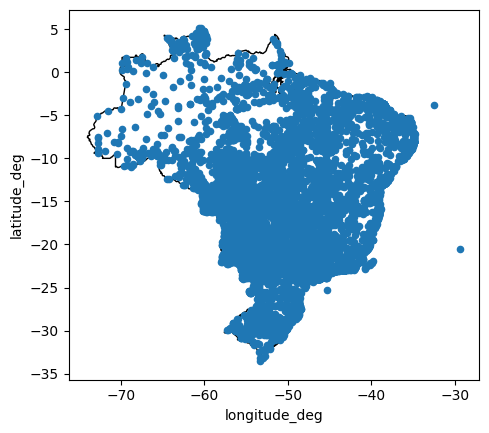

In [67]:
# let's plot

base = countryGit.plot(color='white', edgecolor='black') #unprojected

infoairports.plot.scatter(x = 'longitude_deg', y = 'latitude_deg',ax=base) # proyecta longitud como variable X y latitud como Y sobre la base (ax=base)

Would that be ok? It is supposed to be right.
Let me turn those coordinates into a map of points:

In [69]:
airports=gpd.GeoDataFrame(data=infoairports.copy(), #.copy es crear una copia para no modificar el archivo original
                 geometry=gpd.points_from_xy(infoairports.longitude_deg,
                                             infoairports.latitude_deg),
                 crs=countryGit.crs.to_epsg())# the coordinates were in degrees - unprojected



<Axes: >

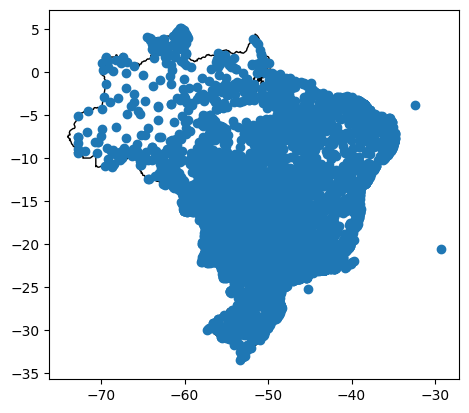

In [70]:
# does it look better?

# let's plot

base = countryGit.plot(color='white', edgecolor='black')
airports.plot(ax=base)

In [71]:
#remember:
type(airports), type(infoairports)

(geopandas.geodataframe.GeoDataFrame, pandas.core.frame.DataFrame)

Then this works:

<Axes: >

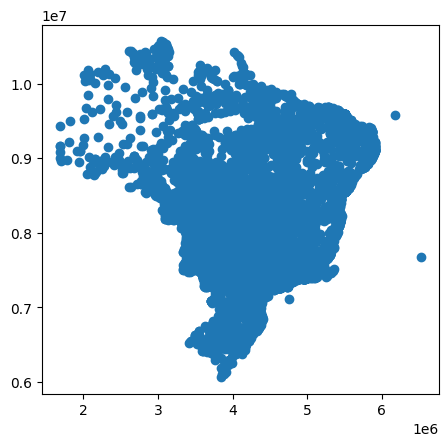

In [73]:
airports.to_crs(5641).plot() # como en mi archivo gpkg están todos los archivos proyectados, entonces debemos poryectar este también

In [74]:
# this does not:
infoairports.to_crs(5641).plot()

AttributeError: ignored

Let's keep the projected version:

In [75]:
airports_5641=airports.to_crs(5641)

Remember you have type of airports:

In [76]:
airports_5641['type'].value_counts() # this will not work: airports.type.value_counts()

small_airport     4699
heliport          1737
closed             271
medium_airport     124
large_airport        7
seaplane_base        2
Name: type, dtype: int64

We may use that in the future. For now, just rename the **type** column to a different one.

In [77]:
airports_5641.rename(columns={'type':'kind'},inplace=True) #el nombre de la columna no debe llamarse type porque pyton se va a equivocar con un comando

Now, let's add this map of points:

In [78]:
airports_5641.to_file(os.path.join("maps","brazilMaps_5641.gpkg"),layer='airports', driver="GPKG")


### Exercise 4
<div class="alert-success">

1. Look for some points in a CSV file about your country.
    
2. Turn those points into a spatial object.
    
3. Update the geopackage with the Brazil layers with the layer of points.
    
</div>

<a class="anchor" id="4"></a>

## Checking Validity of Geometry

Geometries are created in a way that some issues may appear, especially in (multi) polygons.
Let's check if our recent maps on states and municipalities are valid:

In [79]:
# non valid
brazil_states_5641[~brazil_states_5641.is_valid]

,ADM0_EN,ADM0_PT,ADM0_PCODE,ADM1_PT,ADM1_PCODE,geometry
0,Brazil,Brasil,BR,Acre,BR12,"MULTIPOLYGON (((2121076.536 8774544.241, 21207..."
4,Brazil,Brasil,BR,Bahia,BR29,"MULTIPOLYGON (((5477620.095 7981004.282, 54774..."
8,Brazil,Brasil,BR,Goiás,BR52,"MULTIPOLYGON (((4523710.944 8078141.731, 45242..."
10,Brazil,Brasil,BR,Mato Grosso,BR51,"MULTIPOLYGON (((3481367.473 8055127.595, 34820..."
11,Brazil,Brasil,BR,Mato Grosso do Sul,BR50,"MULTIPOLYGON (((3391653.754 7483306.350, 33918..."
12,Brazil,Brasil,BR,Minas Gerais,BR31,"MULTIPOLYGON (((4539375.244 8092113.995, 45390..."
13,Brazil,Brasil,BR,Pará,BR15,"MULTIPOLYGON (((4617908.124 9887788.345, 46174..."
15,Brazil,Brasil,BR,Paraná,BR41,"MULTIPOLYGON (((4272314.502 6993478.644, 42727..."
18,Brazil,Brasil,BR,Rio de Janeiro,BR33,"MULTIPOLYGON (((4818918.475 7345068.157, 48189..."
21,Brazil,Brasil,BR,Rondônia,BR11,"MULTIPOLYGON (((3098482.137 8680172.092, 30982..."


<Axes: >

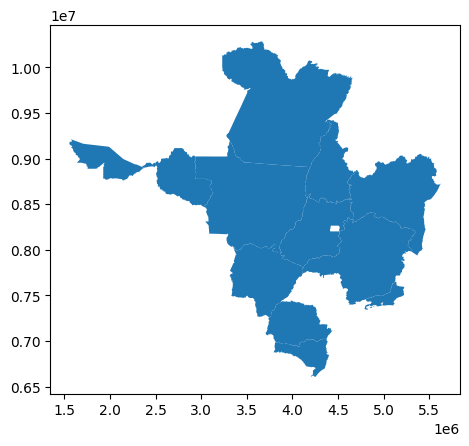

In [80]:
# see the invalid:
brazil_states_5641[~brazil_states_5641.is_valid].plot()

It is difficult to see what is wrong. Let's get some information:

In [81]:
# what is wrong?

from shapely.validation import explain_validity, make_valid

explain_validity(brazil_states_5641[~brazil_states_5641.is_valid].geometry)

0     Ring Self-intersection[2332666.96482957 886800...
4     Ring Self-intersection[4742855.39250743 834160...
8     Ring Self-intersection[4539375.24395716 809211...
10    Ring Self-intersection[3881107.50696585 809096...
11    Ring Self-intersection[3481367.47320096 805512...
12    Ring Self-intersection[4523710.94383913 807814...
13    Ring Self-intersection[4595479.69388275 968288...
15    Ring Self-intersection[4247015.76753548 700800...
18    Ring Self-intersection[4976217.86358401 740193...
21    Ring Self-intersection[3068510.81312985 851673...
23    Ring Self-intersection[4167982.25330359 701809...
26    Ring Self-intersection[4626563.53942947 868935...
Name: geometry, dtype: object

Let's solve the issue:

In [82]:
BrSt5641_valid=brazil_states_5641[~brazil_states_5641.is_valid].copy()

# solving the issue:
BrSt5641_valid['geometry'] = [make_valid(row)  if not row.is_valid else row for row in BrSt5641_valid['geometry']]


In [83]:
# any invalid?
BrSt5641_valid[~BrSt5641_valid.is_valid]

,ADM0_EN,ADM0_PT,ADM0_PCODE,ADM1_PT,ADM1_PCODE,geometry


What about the municipalities layer with more polygons?

In [84]:
brazil_municipalities_5641[~brazil_municipalities_5641.is_valid]

,ADM0_EN,ADM0_PT,ADM0_PCODE,ADM1_PT,ADM1_PCODE,ADM2_PT,ADM2_PCODE,ET_ID,geometry
5,Brazil,Brasil,BR,Rondônia,BR11,Colorado do Oeste,BR1100064,5,"POLYGON ((3071557.291 8521541.630, 3071367.162..."
15,Brazil,Brasil,BR,Rondônia,BR11,Pimenta Bueno,BR1100189,15,"POLYGON ((3057168.663 8724320.552, 3056869.891..."
16,Brazil,Brasil,BR,Rondônia,BR11,Porto Velho,BR1100205,16,"POLYGON ((2856305.059 9048717.998, 2857038.410..."
22,Brazil,Brasil,BR,Rondônia,BR11,São Miguel do Guaporé,BR1100320,22,"POLYGON ((2753262.389 8765192.063, 2753595.113..."
36,Brazil,Brasil,BR,Rondônia,BR11,Itapuã do Oeste,BR1101104,36,"POLYGON ((2801256.168 9023884.917, 2801099.991..."
...,...,...,...,...,...,...,...,...,...
5464,Brazil,Brasil,BR,Goiás,BR52,Matrinchã,BR5212956,5464,"POLYGON ((4141197.917 8313421.144, 4140885.563..."
5470,Brazil,Brasil,BR,Goiás,BR52,Monte Alegre de Goiás,BR5213509,5470,"POLYGON ((4616158.417 8544511.406, 4616233.111..."
5471,Brazil,Brasil,BR,Goiás,BR52,Montes Claros de Goiás,BR5213707,5471,"MULTIPOLYGON (((4066884.969 8218654.089, 40667..."
5496,Brazil,Brasil,BR,Goiás,BR52,Padre Bernardo,BR5215603,5496,"POLYGON ((4404321.702 8311359.407, 4404056.880..."


In [85]:
explain_validity(brazil_municipalities_5641[~brazil_municipalities_5641.is_valid].geometry)

5       Ring Self-intersection[3068508.44978257 851673...
15      Ring Self-intersection[3065079.35271118 868017...
16      Ring Self-intersection[2697459.77578448 903418...
22      Ring Self-intersection[2708460.04757785 872708...
36      Ring Self-intersection[2793277.57533772 901160...
                              ...                        
5464    Ring Self-intersection[4134149.59432842 826732...
5470    Ring Self-intersection[4579443.31264052 849053...
5471    Ring Self-intersection[4016405.94439198 821413...
5496    Ring Self-intersection[4404321.70180657 831135...
5512    Ring Self-intersection[4261277.42674537 804649...
Name: geometry, Length: 256, dtype: object

In [86]:
Validity=pd.Series([x.split('[')[0] for x in explain_validity(brazil_municipalities_5641.geometry)])
Validity.value_counts()

Valid Geometry            5316
Ring Self-intersection     256
dtype: int64

In [87]:
# solving the issue:

BrMun5641_valid=brazil_municipalities_5641.copy()

BrMun5641_valid['geometry'] = [make_valid(row)  if not row.is_valid else row for row in BrMun5641_valid['geometry'] ]
#any invalid?
BrMun5641_valid[~BrMun5641_valid.is_valid]

,ADM0_EN,ADM0_PT,ADM0_PCODE,ADM1_PT,ADM1_PCODE,ADM2_PT,ADM2_PCODE,ET_ID,geometry


The _solution_ we got may help for some advanced techniques, but may also give us some extra trouble. Notice that once geopandas solved the problem, you  have created **collections**:

In [88]:
[x for x in BrMun5641_valid["geometry"]]

[<POLYGON ((2880702.575 8678970.18, 2881137.154 8678859.874, 2881660.006 8679...>,
 <POLYGON ((2839173.154 8911097.984, 2838718.204 8910885.753, 2838439.802 891...>,
 <POLYGON ((3067184.343 8504324.153, 3067191.133 8503935.715, 3066838.038 850...>,
 <POLYGON ((2997393.73 8777661.276, 2997393.73 8770664.256, 2997393.73 874828...>,
 <POLYGON ((2974496.868 8540812.592, 2974897.495 8540570.143, 2975467.879 854...>,
 <POLYGON ((3071367.162 8521146.506, 3071421.485 8520522.615, 3071278.889 852...>,
 <POLYGON ((3036268.147 8552904.635, 3035500.844 8552565.354, 3034896.508 855...>,
 <POLYGON ((2699327.106 8704013.071, 2699571.556 8703689.311, 2699659.83 8703...>,
 <POLYGON ((3057637.194 8777929.305, 3056978.535 8777571.933, 3056645.811 877...>,
 <MULTIPOLYGON (((2708460.048 8727087.796, 2708928.578 8727005.195, 2709071.1...>,
 <POLYGON ((2871236.909 8863979.571, 2871101.103 8863431.157, 2870931.346 886...>,
 <POLYGON ((2933666.847 8920914.042, 2933571.782 8920496.537, 2933789.072 892...>,
 <PO

Let's not save these last changes.

### Exercise 5

<div class="alert-success">

1. Check if all your polygons are valid in every map you have (map of polygons only).
    
2. If you detect some invalid geometries, detect what the problem is.
    
3. Correct all cases. Do not save the results.
    
</div>

### Exercise 6

<div class="alert-success">

Open the geopackage file in R and use ggplot2 to see the maps.
    
</div>